## EEG signal grapher

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
How to upload EEG signals
</div>
<br>
<div style="text-align: justify;">
We have EEG signals generated by the equipment we are using. These signals can be saved in various file formats (.csv, .txt, .m, .cnt) among others. In these files, we can find information about the patient, the equipment, test characteristics, and other details.
</div>
<br>

<div style="text-align: justify;">
If we are only interested in viewing the signal, we can load it as a matrix or an array of values corresponding to a time axis. These values represent voltages. As we saw in the previous section, the voltage is the potential difference measured by the electrodes, which originates from the activation of groups of neurons.
</div>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Load the EEG file (replace 'your_file.cnt' with the path to your file)
eeg_file = 'test_signal.cnt'
eeg_data = mne.io.read_raw_cnt(eeg_file, preload=True)


Reading 0 ... 3069  =      0.000 ...     7.673 secs...


C:\Users\DeusWin\AppData\Local\Temp\ipykernel_4500\4095995129.py:7: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  eeg_data = mne.io.read_raw_cnt(eeg_file, preload=True)
C:\Users\DeusWin\AppData\Local\Temp\ipykernel_4500\4095995129.py:7: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  eeg_data = mne.io.read_raw_cnt(eeg_file, preload=True)


<Figure size 800x400 with 0 Axes>

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
Metadata
</div>
<br>

<div style="text-align: justify;">
Before we start plotting, let's review how this EEG test was conducted: the number of channels (electrodes), the duration, the sampling frequency, and other relevant information.</div>
<br>


In [30]:
# Get basic information about the file
print(eeg_data.info)


<Info | 11 non-empty values
 bads: 2 items (LEFT_EAR, VEOGR)
 ch_names: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...
 chs: 128 EEG
 custom_ref_applied: False
 description: Unspecified
 dig: 131 items (3 Cardinal, 128 EEG)
 highpass: 0.0 Hz
 lowpass: 200.0 Hz
 meas_date: unspecified
 nchan: 128
 projs: []
 sfreq: 400.0 Hz
 subject_info: 5 items (dict)
>


<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
We graph the signals
</div>
<br>

<div style="text-align: justify;">
We plotted all the signals on a single graph to visualize their behavior. To do this, we plotted the loaded signal using the <span style="color: #b1c5fc;">"plot"</span> function. 

</div>
<br>
With this function, we can modify multiple parameters, such as the title, time, scale, number of channels, and many other parameters to improve visualization

Reading 0 ... 3069  =      0.000 ...     7.673 secs...


C:\Users\DeusWin\AppData\Local\Temp\ipykernel_4500\3622086706.py:2: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  eeg_data = mne.io.read_raw_cnt(eeg_file, preload=True)
C:\Users\DeusWin\AppData\Local\Temp\ipykernel_4500\3622086706.py:2: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  eeg_data = mne.io.read_raw_cnt(eeg_file, preload=True)


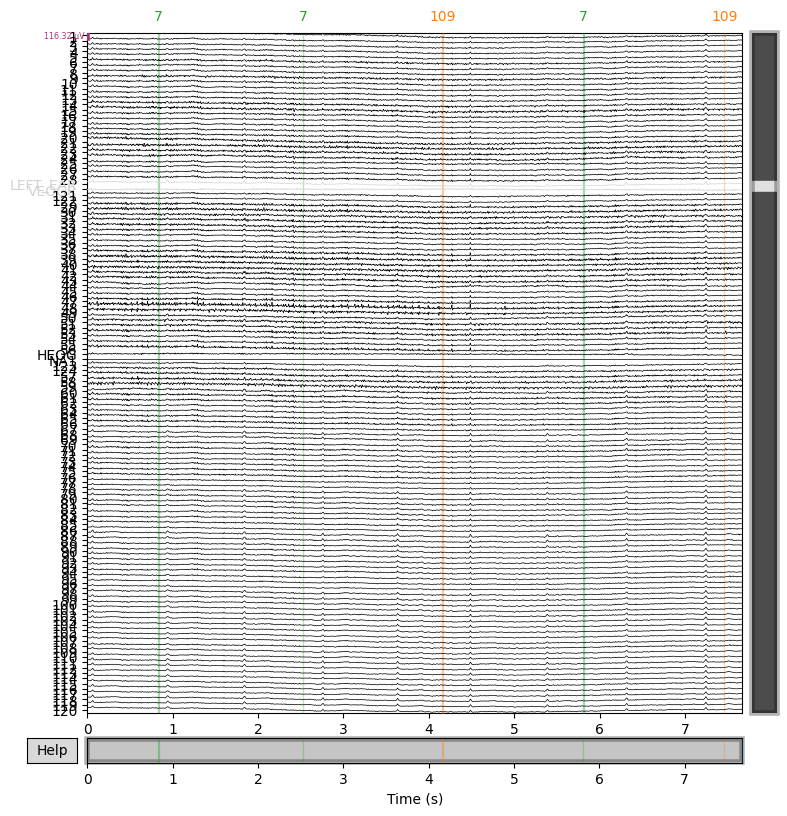

<Figure size 800x400 with 0 Axes>

In [31]:
# Read the EEG data using MNE
eeg_data = mne.io.read_raw_cnt(eeg_file, preload=True)

# Visualize the EEG signal
eeg_data.plot(n_channels=128, scalings='auto', title='EEG Signal', show=True)        # You can adjust the number of channels and the time range according to your needs

# Retrieve the current figure
plt.gcf().set_size_inches(8, 4)                                                     # Adjust the size as needed
plt.show()


<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
We adjust the parameters to better visualize
</div>
<br>

<div style="text-align: justify;">
We will plot only 5 channels to improve signal visualization. This will allow us to improve visualization and understand the behavior of the individual signals. 
</div>
<br>


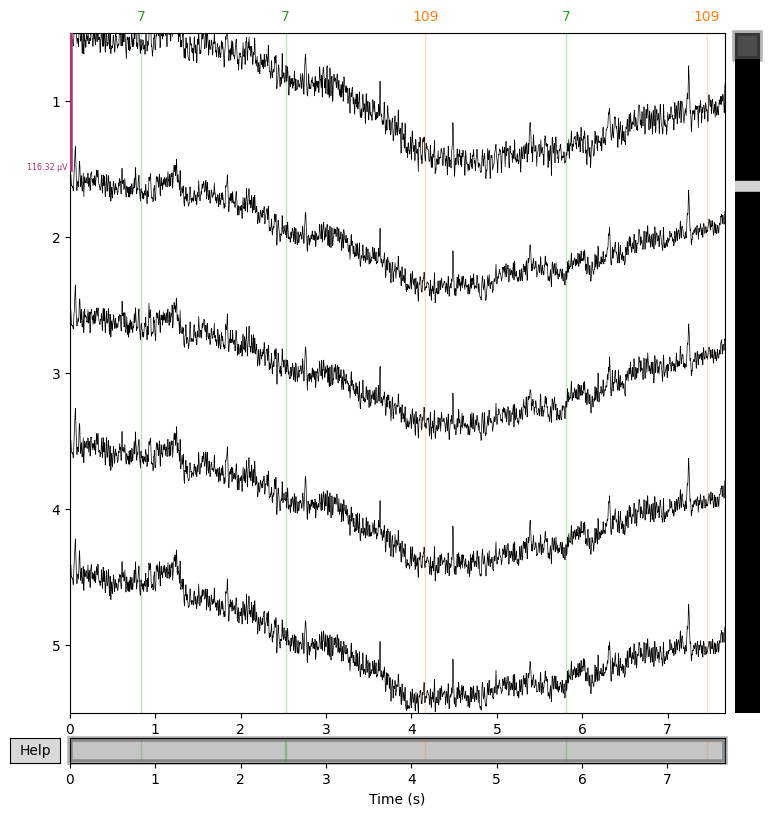

<Figure size 800x400 with 0 Axes>

In [35]:
# Visualize the EEG signal
eeg_data.plot(n_channels=5, scalings='auto', title='EEG Signal', show=True)         # Change the number of channels to 5

# Retrieve the current figure
plt.gcf().set_size_inches(8, 4)                                                     # Adjust the size as needed
plt.show()

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
Raw signal, single channel
</div>
<br>

<div style="text-align: justify;">
To reach that point, we need to process the signal: filter it, remove trends, trim it, and distribute it into different channels as vector arrays.
<br>
In this format, we can manipulate and create functions that allow us to transform the signal as desired, with the goal of obtaining a noise-free signal.

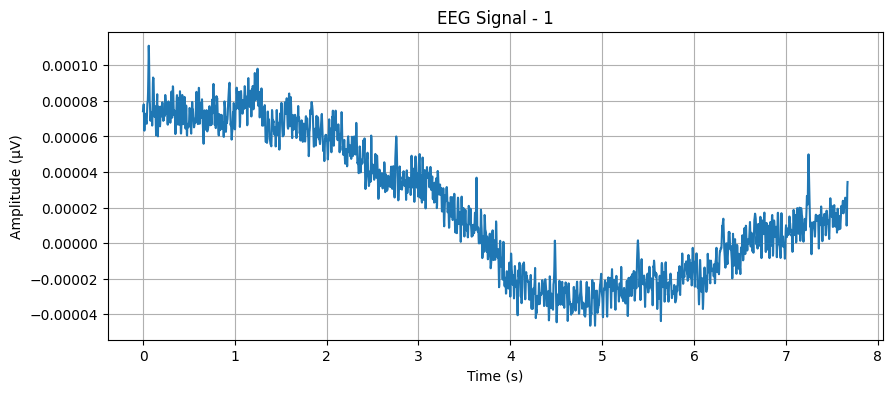

In [36]:
# Choose a channel (e.g., the first channel)
channel_name = eeg_data.ch_names[0]  # Replace with your channel of interest

# Extract data for the chosen channel
data, times = eeg_data[channel_name, :]  # `data` is the signal, `times` is the time vector

# Plot the single channel data
plt.figure(figsize=(10, 4))                 # Adjust the size as needed
plt.plot(times, data.T)                     # Transpose `data` to match dimensions
plt.title(f'EEG Signal - {channel_name}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
Final notes
</div>
<br>

<div style="text-align: justify;">
To reach that point, we need to process the signal: filter it, remove trends, trim it, and distribute it into different channels as vector arrays.
<br>


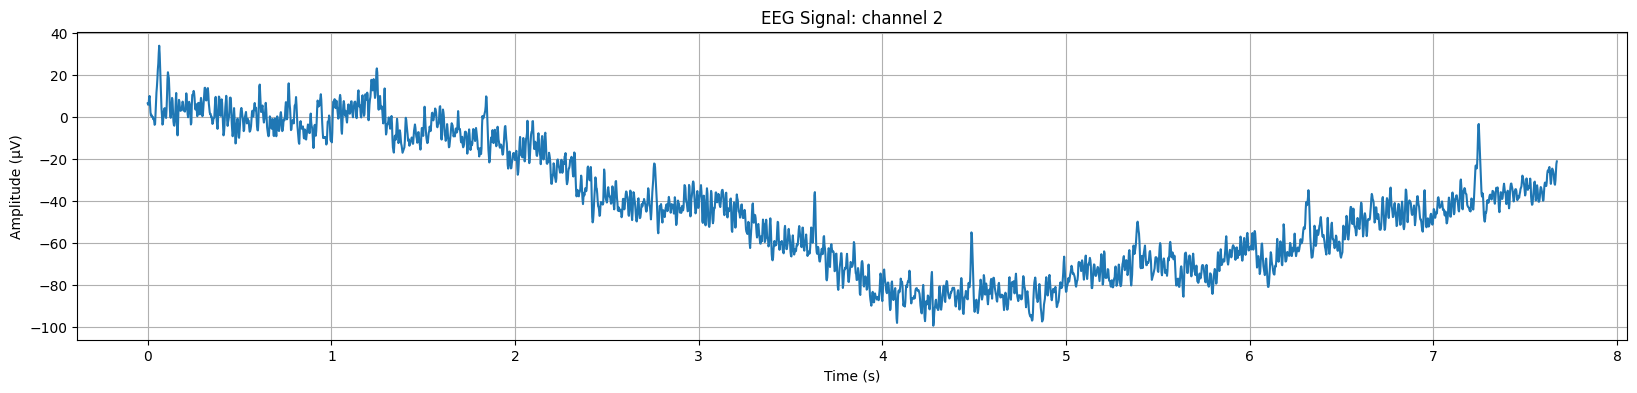

In [41]:
# Choose a channel (e.g., the first channel)
channel_name = eeg_data.ch_names[1]         # Replace with your channel of interest

# Extract data for the chosen channel
data, times = eeg_data[channel_name, :]     # `data` is the signal, `times` is the time vector
data_volts = data * 1e6                     # Convert amplitude to volts (V to µV) and then scale to display integers

# Plot the single channel data
plt.figure(figsize=(20, 4))                 # Adjust the size as needed
plt.plot(times, data_volts.T)               # Transpose `data_volts` to match dimensions
plt.title(f'EEG Signal: channel {channel_name}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')                # µV is still used in label, but data is scaled
plt.grid(True)
plt.show()